# 서울특별시 공공자전거 (따릉이)

## 1. 데이터 선정 이유
-> 서울시의 버스,지하철, 택시 이외의 교통수단으로 단거리 교통수단으로 활용할 수 있게, 서울 시민이 필요할 때 따릉이 부족으로 이용을 하지 못하는 상황을 막기 위한 방책 모색

## 문제 정의 
사용자가 몰리는 특정 시간, 특정 지역에 가용할 수 있는 자전거를 미리미리 배치 하려면 대략적으로 대여소에 자전거를 배치하여야할까? (예측 문제)

의문점들

1. 이용 횟수가 시간이 갈수록 늘어나는가?
2. 남녀 비율?
3. 대여소가 많은 지역? 
4. 대여를 많이 한 지역?
5. 반납을 많이 한 지역?
6. 이용자가 많은 시간대?
7. 날씨 영향은 없는지?


In [1]:
import csv
import pandas as pd
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family='AppleGothic')



# 3. 대여소가 많은 지역

In [2]:
rent_office_file_path = "../rent_office/공공자전거 대여소 정보(21.06월 기준).csv"

rent_office = pd.read_csv(rent_office_file_path)

rent_office.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD


In [3]:
# 결측치 0 으로
rent_office.loc[:, ('LCD', 'QR')] = rent_office.loc[:, ('LCD', 'QR')].fillna(0)
#rent_office.columns

# 자전거 거치 총 갯수 
rent_office['rent_count'] = rent_office['LCD'] + rent_office['QR']
rent_office.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,rent_count
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,0.0,LCD,20.0
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,0.0,LCD,14.0
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,0.0,LCD,13.0
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,0.0,LCD,5.0
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,0.0,LCD,10.0


In [4]:
rent_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   대여소번호       2467 non-null   int64  
 1   보관소(대여소)명   2467 non-null   object 
 2   자치구         2467 non-null   object 
 3   상세주소        2467 non-null   object 
 4   위도          2467 non-null   float64
 5   경도          2467 non-null   float64
 6   설치시기        2467 non-null   object 
 7   LCD         2467 non-null   float64
 8   QR          2467 non-null   float64
 9   운영방식        2467 non-null   object 
 10  rent_count  2467 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 212.1+ KB


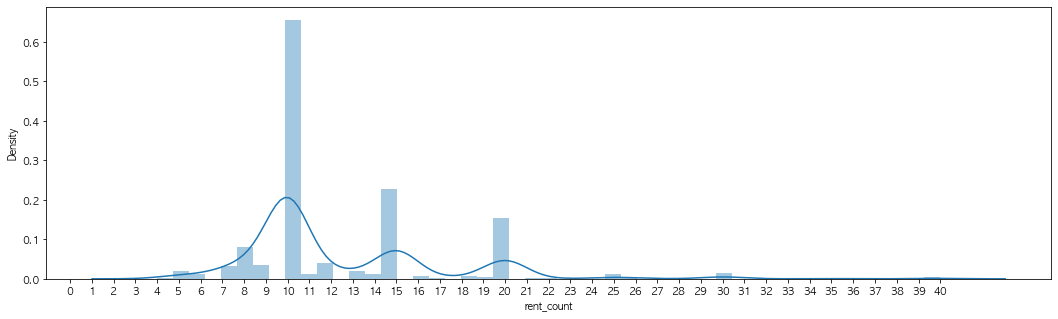

In [5]:
plt.figure(figsize=(18, 5))
sns.distplot(rent_office['rent_count'])
plt.xticks(range(0, 41))
plt.show()

In [6]:
rent_office['rent_count'].describe()

count    2467.000000
mean       12.417106
std         4.744904
min         4.000000
25%        10.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: rent_count, dtype: float64

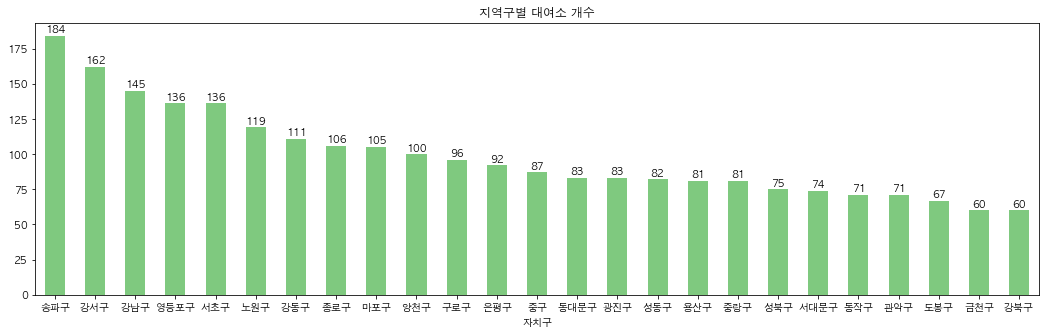

In [7]:
gu_bike_count = rent_office.groupby('자치구').size()


def count_draw(df, title):
    df.sort_values(ascending=False, inplace=True)
    ax = df.plot(kind='bar', figsize=(
        18, 5), rot=0, title=title, colormap='Accent')
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%d" % (height), (left+width/2, height+2), ha='center')


count_draw(gu_bike_count, "지역구별 대여소 개수")


지역구에서 대여소가 많은 지역으로는 
1. 송파구
2. 강서구
3. 강남구
4. 영등포구, 서초구

순으로 나타남

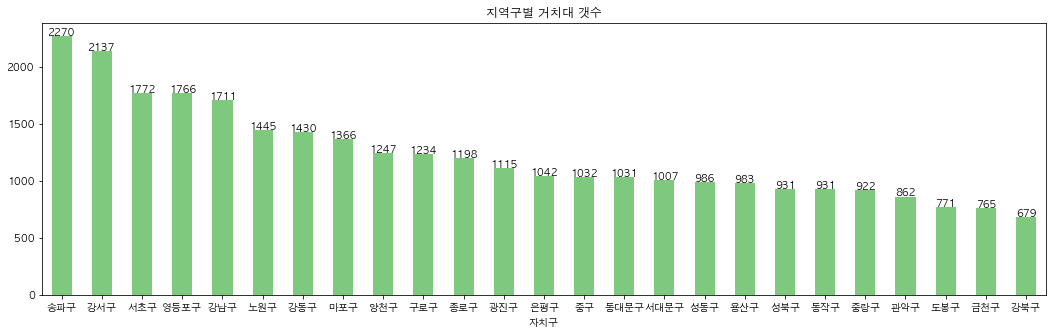

In [8]:
gu_rent_count = rent_office.groupby('자치구')['rent_count'].sum()

count_draw(gu_rent_count, "지역구별 거치대 갯수")

지역구별 거치대 갯수가 많은 순위
1. 송파구
2. 강서구
3. 서초구
4. 영등포구
5. 강남구

자치구
서대문구    13.608108
광진구     13.433735
강서구     13.191358
동작구     13.112676
서초구     13.029412
마포구     13.009524
영등포구    12.985294
강동구     12.882883
구로구     12.854167
금천구     12.750000
양천구     12.470000
동대문구    12.421687
성북구     12.413333
송파구     12.336957
노원구     12.142857
관악구     12.140845
용산구     12.135802
성동구     12.024390
중구      11.862069
강남구     11.800000
도봉구     11.507463
중랑구     11.382716
은평구     11.326087
강북구     11.316667
종로구     11.301887
dtype: float64


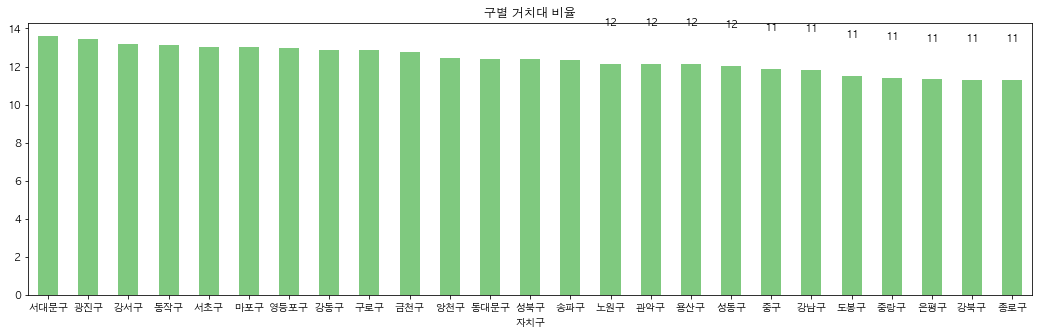

In [9]:
gu_percent_count = gu_rent_count / gu_bike_count

count_draw(gu_percent_count,"구별 거치대 비율")
print(gu_percent_count)

지역구별 대여소 당 평균 거치대 수
1. 서대문구
2. 광진구
3. 강서구
4. 동작구
5. 서초구 

==> 전체적으로 봤을때 강서구 중점적으로 기준 잡는게 좋을듯?

## 대여를 많이 한 지역
## 반납을 많이 한 지역

In [10]:
import csv
import pandas as pd
import glob

# get data file names
path = '../Data2/'
filenames = glob.glob(path + "*.csv")

dfs = []
for filename in filenames:
    print("starting...\n", filename)
    try:
        #print(pd.read_csv(filename, encoding='euc-kr').head())
        dfs.append(pd.read_csv(filename, encoding='euc-kr'))
    except:
        #print(pd.read_csv(filename, encoding='cp949').head())
        dfs.append(pd.read_csv(filename, encoding='cp949'))
    print("ending...\n", filename)


starting...
 ../Data2/공공자전거 대여이력 정보_2020.02.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.02.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.03.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.03.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.01.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.01.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.10.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.10.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.04.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.04.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.11.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.11.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.12.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020.12.csv
starting...
 ../Data2/공공자전거 대여이력 정보_2020.06.csv
ending...
 ../Data2/공공자전거 대여이력 정보_2020

In [11]:
big_frame = pd.concat(dfs, ignore_index=True)

In [12]:
big_frame.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22727,2020-01-31 23:40:04,183,하늘채코오롱아파트 건너편,15,2020-02-01 00:00:02,00113,홍대입구역 2번출구 앞,10,19.0,2430.0
1,SPB-21546,2020-01-31 22:05:17,3106,홍남교 두바퀴쉼터,6,2020-02-01 00:00:06,03106,홍남교 두바퀴쉼터,7,105.0,860.0
2,SPB-24679,2020-01-31 23:55:01,1435,능산삼거리,8,2020-02-01 00:00:08,01430,중랑구청,19,4.0,720.0
3,SPB-20312,2020-01-31 23:54:06,1656,중앙하이츠 아파트 입구,2,2020-02-01 00:00:11,01625,상계역(4번출구),16,5.0,660.0
4,SPB-21946,2020-01-31 23:41:05,237,보라매 두산위브 건너편,1,2020-02-01 00:00:11,02169,봉천역 2번출구,6,19.0,2890.0


In [13]:
big_frame.shape

(36901873, 11)

In [14]:
big_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36901873 entries, 0 to 36901872
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.0+ GB


In [15]:
big_frame.isna().sum()

자전거번호         0
대여일시          0
대여 대여소번호      0
대여 대여소명       0
대여거치대         0
반납일시          0
반납대여소번호       0
반납대여소명        0
반납거치대         0
이용시간          0
이용거리        451
dtype: int64

In [16]:
big_frame.dropna(inplace=True)

In [17]:
#반납대여소번호 object -> int
#big_frame['반납대여소번호'] = big_frame['반납대여소번호'].astype('int64')
#str_list = big_frame['반납대여소번호'].unique()
#print(big_frame.shape)
#p = re.compile(r'[^0-9]+')

#condition = p.match(str(big_frame['반납대여소번호']))


#print(condition)
#print(int(big_frame['반납대여소번호'][0]))
big_frame['반납대여소번호'] = pd.to_numeric(big_frame['반납대여소번호'], errors='coerce')

#big_frame.drop(big_frame[condition].index, inplace=True)

#print(big_frame.shape)



#with open("반납대여소번호리스트.txt", "w") as file:
#    for value in str_list:
#        file.writelines(str(value))
#str_list


In [18]:
#big_frame['반납대여소번호'] = big_frame['반납대여소번호'].astype('int64')
big_frame['반납대여소번호'].value_counts()
print(big_frame['반납대여소번호'].shape)
big_frame['반납대여소번호'] = big_frame['반납대여소번호'].replace([np.inf, -np.inf], np.nan)
big_frame['반납대여소번호'] = big_frame['반납대여소번호'].replace(["NA","inf"], np.nan)
big_frame['반납대여소번호'].dropna(inplace=True)

print(big_frame['반납대여소번호'].shape)
#big_frame['반납대여소번호'] = big_frame['반납대여소번호'].astype('int')
test = big_frame['반납대여소번호'].tolist()
test

#with open("반납대여소번호리스트.txt", "w") as file:
#    for value in test:
#        file.writelines(str(value))
#        file.write("\n")



(36901422,)
(36901422,)


[113,
 3106,
 1430,
 1625,
 2169,
 371,
 586,
 3501,
 371,
 1914,
 2245,
 115,
 2372,
 1321,
 602,
 1655,
 663,
 1050,
 1601,
 2012,
 2615,
 1458,
 126,
 1901,
 2263,
 712,
 2111,
 634,
 362,
 244,
 175,
 739,
 1050,
 3513,
 2265,
 2217,
 2185,
 735,
 2105,
 565,
 1210,
 1366,
 300,
 415,
 2217,
 1686,
 641,
 1361,
 2217,
 3529,
 2396,
 121,
 244,
 950,
 2340,
 3509,
 1960,
 231,
 1436,
 1742,
 2356,
 739,
 3509,
 743,
 1666,
 585,
 2412,
 1805,
 1723,
 2412,
 155,
 280,
 131,
 505,
 593,
 3535,
 809,
 431,
 1713,
 1011,
 1925,
 900,
 504,
 593,
 1425,
 2235,
 573,
 1204,
 1113,
 907,
 2025,
 1416,
 286,
 3509,
 395,
 307,
 835,
 264,
 1050,
 1637,
 562,
 558,
 2314,
 1290,
 307,
 708,
 1024,
 2228,
 1209,
 1916,
 1222,
 3501,
 3504,
 1013,
 1734,
 2292,
 355,
 2060,
 760,
 154,
 154,
 250,
 593,
 361,
 614,
 1656,
 257,
 962,
 1011,
 151,
 150,
 1450,
 230,
 150,
 1110,
 1731,
 708,
 130,
 832,
 514,
 845,
 828,
 164,
 402,
 1653,
 932,
 1171,
 502,
 539,
 439,
 156,
 1131,
 289,
 292

In [19]:
big_frame['반납대여소번호'] = big_frame['반납대여소번호'].astype('int')

In [20]:
big_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36901422 entries, 0 to 36901872
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   int64  
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.3+ GB


In [21]:
database = rent_office[['대여소번호','자치구']]
database

,대여소번호,자치구
0,102,마포구
1,103,마포구
2,104,마포구
3,105,마포구
4,106,마포구
...,...,...
2462,4864,송파구
2463,4865,송파구
2464,4867,송파구
2465,4868,송파구


In [22]:
db1 = database.rename(columns={'대여소번호':'대여 대여소번호','자치구':'대여 자치구'})

In [23]:
rent_df = pd.merge(big_frame, db1,
                   left_on='대여 대여소번호', right_on='대여 대여소번호', how='inner')
rent_df.head()

In [ ]:
#rent_df.drop('대여소번호', axis=1, inplace=True)

KeyError: "['대여소번호'] not found in axis"

In [ ]:
#rent_df.rename(columns={"자치구": "대여 자치구"}, inplace=True)
rent_df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,대여 자치구
0,SPB-22727,2020-01-31 23:40:04,183,하늘채코오롱아파트 건너편,15,2020-02-01 00:00:02,113,홍대입구역 2번출구 앞,10,19.0,2430.0,마포구
1,SPB-19680,2020-02-01 00:49:15,183,하늘채코오롱아파트 건너편,1,2020-02-01 02:10:34,183,하늘채코오롱아파트 건너편,3,75.0,13550.0,마포구
2,SPB-09801,2020-02-01 02:18:49,183,하늘채코오롱아파트 건너편,7,2020-02-01 02:28:16,155,가좌역1 번출구 뒤,7,9.0,610.0,마포구
3,SPB-25172,2020-02-01 02:53:29,183,하늘채코오롱아파트 건너편,1,2020-02-01 03:04:45,152,마포구민체육센터 앞,6,10.0,2560.0,마포구
4,SPB-24455,2020-02-01 06:23:35,183,하늘채코오롱아파트 건너편,15,2020-02-01 06:34:40,102,망원역 1번출구 앞,2,10.0,1850.0,마포구


In [ ]:
db2 = database.rename(columns={"대여소번호":"반납대여소번호","자치구":"반납자치구"}, inplace=True)
db2

,반납대여소번호,반납자치구
0,102,마포구
1,103,마포구
2,104,마포구
3,105,마포구
4,106,마포구
...,...,...
2462,4864,송파구
2463,4865,송파구
2464,4867,송파구
2465,4868,송파구


In [ ]:
rent_df = pd.merge(rent_df, db2,
                   left_on='반납대여소번호', right_on='반납대여소번호', how='inner')
rent_df.head()


,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,반납자치구_x,반납자치구_y
0,SPB-22727,2020-01-31 23:40:04,183,하늘채코오롱아파트 건너편,15,2020-02-01 00:00:02,113,홍대입구역 2번출구 앞,10,19.0,2430.0,마포구,마포구
1,SPB-14785,2020-02-01 00:18:14,102,망원역 1번출구 앞,14,2020-02-01 00:27:05,113,홍대입구역 2번출구 앞,23,8.0,1450.0,마포구,마포구
2,SPB-22653,2020-02-01 00:30:18,151,망원1동주민센터,8,2020-02-01 00:38:54,113,홍대입구역 2번출구 앞,21,7.0,1600.0,마포구,마포구
3,SPB-13700,2020-01-31 23:38:13,114,홍대입구역 8번출구 앞,11,2020-02-01 00:39:51,113,홍대입구역 2번출구 앞,10,61.0,3730.0,마포구,마포구
4,SPB-21101,2020-02-01 00:47:10,107,신한은행 서교동금융센터점 앞,5,2020-02-01 00:50:32,113,홍대입구역 2번출구 앞,17,3.0,390.0,마포구,마포구


In [ ]:
# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True)

In [ ]:
big_frame.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [ ]:
big_frame.describe()

,대여시간,대여소번호,이용건수,이동거리,사용시간
count,1.362698e+07,1.362698e+07,1.362698e+07,1.362698e+07,1.362698e+07
mean,1.416080e+01,1.371831e+03,1.210819e+00,2.491977e+03,3.570783e+01
std,6.021043e+00,9.443941e+02,6.221118e-01,1.229316e+05,4.268705e+01
min,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,5.930000e+02,1.000000e+00,0.000000e+00,1.000000e+01
50%,1.500000e+01,1.211000e+03,1.000000e+00,0.000000e+00,2.100000e+01
75%,1.900000e+01,2.016000e+03,1.000000e+00,0.000000e+00,4.700000e+01
max,2.300000e+01,9.999900e+04,5.300000e+01,3.954919e+07,3.446000e+03


In [ ]:
big_frame.describe()

,대여시간,대여소번호,이용건수,이동거리,사용시간
count,1.362698e+07,1.362698e+07,1.362698e+07,1.362698e+07,1.362698e+07
mean,1.416080e+01,1.371831e+03,1.210819e+00,2.491977e+03,3.570783e+01
std,6.021043e+00,9.443941e+02,6.221118e-01,1.229316e+05,4.268705e+01
min,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,5.930000e+02,1.000000e+00,0.000000e+00,1.000000e+01
50%,1.500000e+01,1.211000e+03,1.000000e+00,0.000000e+00,2.100000e+01
75%,1.900000e+01,2.016000e+03,1.000000e+00,0.000000e+00,4.700000e+01
max,2.300000e+01,9.999900e+04,5.300000e+01,3.954919e+07,3.446000e+03


In [ ]:
big_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13626982 entries, 0 to 13626981
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   대여소명    object 
 4   대여구분코드  object 
 5   성별      object 
 6   연령대코드   object 
 7   이용건수    int64  
 8   운동량     object 
 9   탄소량     object 
 10  이동거리    float64
 11  사용시간    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 1.2+ GB
